In [1]:
#need to remove outliers
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import statistics as stats
from statsmodels.graphics.gofplots import qqplot, qqline
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
visitsPerMothPath = r"E:\Downloads\ManducaMultiSenseData\Step5"
duration_path = r"E:\Downloads\ManducaMultiSenseData\Moth_Visits_Information\Duration"
outpath = r"E:\Downloads\ManducaMultiSenseData\Moth_Visits_Information"

In [3]:
moth_list_files = glob.glob(visitsPerMothPath + "\\*.csv")
moth_list_files[0][41:-30]

'L0.1_c-3_m10'

In [4]:
names = []
visit_per_moth = []
light_level = []
successful_visits = []
fed_status = []
ratio_list = []
for moth in moth_list_files:
    df = pd.read_csv(moth)
    name = moth[41:-30]
    visit_number = len(df.In_Frame)
    successful_number = len(df.ProboscisDetect[df.ProboscisDetect.values>0])
    successful_visits.append(successful_number)
    visit_per_moth.append(visit_number)
    ratio_list.append(successful_number/visit_number)
    names.append(name)
    if name.startswith("L50"):  
        light = ["high"]

    elif name.startswith("L0.1"):
        light = ["low"]
    if successful_number > 0:
        fed = ["yes"]
    else:
        fed = ["no"]
        
    fed_status.append(fed)
    light_level.append(light)
    
    duration = []
    pre_duration = []
    post_duration = []

    for dset in df.index:
        dur = df.Out_Frame.values[dset] - df.In_Frame.values[dset]
        if df.ProboscisDetect.values[dset]>0:
            pre_dur = df.ProboscisDetect.values[dset] - df.In_Frame.values[dset]
            post_dur = -df.ProboscisDetect.values[dset]+ df.Out_Frame.values[dset]
        else:
            pre_dur = dur
            post_dur = 0
        duration.append(dur)
        pre_duration.append(pre_dur)
        post_duration.append(post_dur)
    new = pd.DataFrame({'duration': duration, 'pre_duration': pre_duration, 'post_duration': post_duration})
    step5_duration = pd.concat([df,new], axis = 1)
    step5_duration.to_csv(duration_path + "\\" + name + "_duration.csv")
new_df = pd.DataFrame({'name' : names, 'visits' : visit_per_moth, 'ratio': ratio_list, 'successful_visits' : successful_visits,
                        'Fed_Status': list(np.squeeze(fed_status)), 'Light_Level': list(np.squeeze(light_level))})
new_df.to_csv(outpath + "\\Moth_Visits_Table.csv")
names, visit_per_moth, successful_visits, fed_status, light_level

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


(['L0.1_c-3_m10',
  'L0.1_c-3_m12',
  'L0.1_c-3_m20',
  'L0.1_c-3_m21',
  'L0.1_c-3_m22',
  'L0.1_c-3_m23',
  'L0.1_c-3_m24',
  'L0.1_c-3_m25',
  'L0.1_c-3_m27',
  'L0.1_c-3_m2',
  'L0.1_c-3_m32',
  'L0.1_c-3_m34',
  'L0.1_c-3_m37',
  'L0.1_c-3_m38',
  'L0.1_c-3_m39',
  'L0.1_c-3_m40',
  'L0.1_c-3_m41',
  'L0.1_c-3_m43',
  'L0.1_c-3_m44',
  'L0.1_c-3_m45',
  'L0.1_c-3_m46',
  'L0.1_c-3_m47',
  'L0.1_c-3_m48',
  'L0.1_c-3_m49',
  'L0.1_c-3_m50',
  'L0.1_c-3_m54',
  'L0.1_c-3_m57',
  'L0.1_c-3_m5',
  'L0.1_c-3_m8',
  'L50_c-3_m10',
  'L50_c-3_m12',
  'L50_c-3_m13',
  'L50_c-3_m14',
  'L50_c-3_m15',
  'L50_c-3_m21',
  'L50_c-3_m22',
  'L50_c-3_m24',
  'L50_c-3_m25',
  'L50_c-3_m26',
  'L50_c-3_m2',
  'L50_c-3_m30',
  'L50_c-3_m32',
  'L50_c-3_m33',
  'L50_c-3_m34',
  'L50_c-3_m35',
  'L50_c-3_m37',
  'L50_c-3_m38',
  'L50_c-3_m39',
  'L50_c-3_m45',
  'L50_c-3_m49',
  'L50_c-3_m50',
  'L50_c-3_m51',
  'L50_c-3_m58',
  'L50_c-3_m6',
  'L50_c-3_m9'],
 [4,
  3,
  63,
  63,
  20,
  7,
  1,
  2

In [5]:
moth_data = pd.read_csv(outpath + "\\Moth_Visits_Table.csv")

In [6]:
moth_data

,Unnamed: 0,name,visits,ratio,successful_visits,Fed_Status,Light_Level
0,0,L0.1_c-3_m10,4,0.000000,0,no,low
1,1,L0.1_c-3_m12,3,0.000000,0,no,low
2,2,L0.1_c-3_m20,63,0.873016,55,yes,low
3,3,L0.1_c-3_m21,63,0.825397,52,yes,low
4,4,L0.1_c-3_m22,20,0.950000,19,yes,low
5,5,L0.1_c-3_m23,7,0.000000,0,no,low
6,6,L0.1_c-3_m24,1,0.000000,0,no,low
7,7,L0.1_c-3_m25,2,0.500000,1,yes,low
8,8,L0.1_c-3_m27,9,0.000000,0,no,low
9,9,L0.1_c-3_m2,10,0.800000,8,yes,low


(0.892335057258606, 0.006451655179262161) low_visit
(0.8658304810523987, 0.0029306476935744286) high_visit


(None, None)

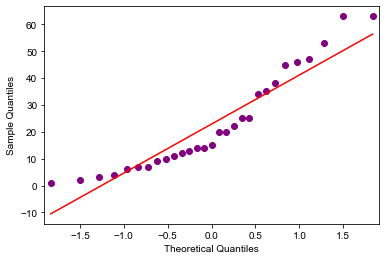

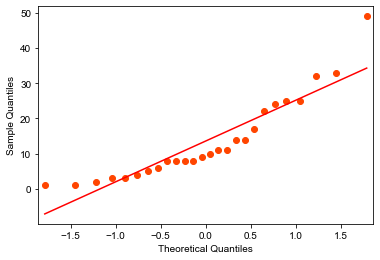

In [7]:
high_visit_list = moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].visits.values
low_visit_list = moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].visits.values
qqplot(low_visit_list, line='s', c = "purple"), qqplot(high_visit_list, line='s', c = "orangered"), 
print(sc.stats.shapiro(low_visit_list), 'low_visit'),  print(sc.stats.shapiro(high_visit_list), 'high_visit')

(0.8642219305038452, 0.0015128146624192595) low_succ
(0.7708052396774292, 5.839241566718556e-05) high_succ


(None, None)

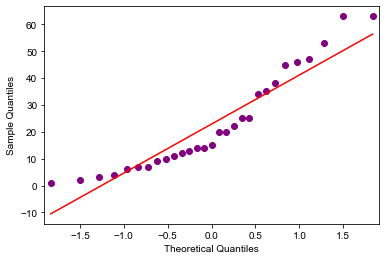

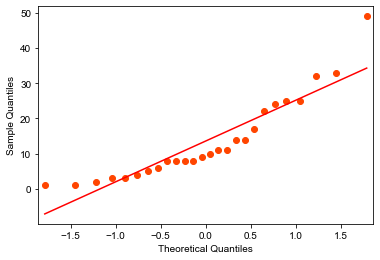

In [8]:
high_succ_list = moth_data[(moth_data.Light_Level.str.contains("high"))].successful_visits.values
low_succ_list = moth_data[(moth_data.Light_Level.str.contains("low"))].successful_visits.values
qqplot(low_visit_list, line='s', c = "purple"), qqplot(high_visit_list, line='s', c = "orangered")
print(sc.stats.shapiro(low_succ_list), 'low_succ'),  print(sc.stats.shapiro(high_succ_list), 'high_succ')

(0.8254665732383728, 0.00024770977324806154) low_ratio
(0.8211203813552856, 0.00041164946742355824) high_ratio


(None, None)

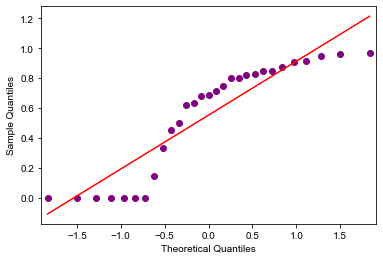

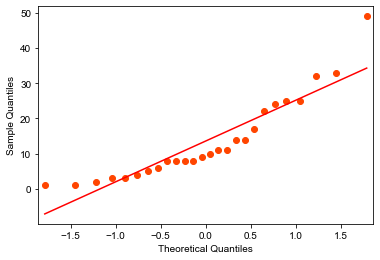

In [9]:
high_ratio_list = moth_data[(moth_data.Light_Level.str.contains("high"))].ratio.values
low_ratio_list = moth_data[(moth_data.Light_Level.str.contains("low"))].ratio.values
qqplot(low_ratio_list, line='s', c = "purple"), qqplot(high_visit_list, line='s', c = "orangered")
print(sc.stats.shapiro(low_ratio_list), 'low_ratio'),  print(sc.stats.shapiro(high_ratio_list), 'high_ratio')

(Ks_2sampResult(statistic=0.2718832891246684, pvalue=0.20835369788239588),
 MannwhitneyuResult(statistic=491.0, pvalue=0.05547119289561542))

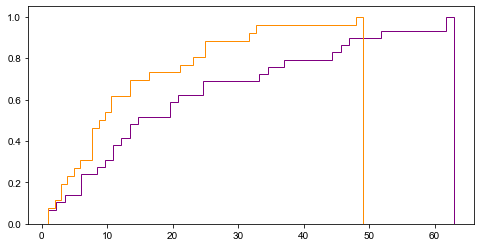

In [10]:
#KS p-value = 0.2 Utest p-value = 0.053. Small largest gap but orange is always higher (I guess not significantly? Like the magnitude of difference is small)
n_bins = 50
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(low_visit_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(high_visit_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')
sc.stats.ks_2samp(high_visit_list, low_visit_list), sc.stats.mannwhitneyu(low_visit_list, high_visit_list, use_continuity=True, alternative='two-sided')

(Ks_2sampResult(statistic=0.3819628647214854, pvalue=0.02577811840914135),
 MannwhitneyuResult(statistic=489.5, pvalue=0.05518360592055565))

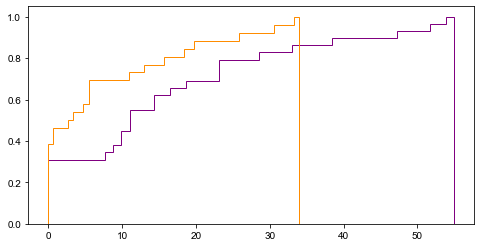

In [11]:
#KS p-value = 0.026 Utest p-value = 0.055. Massive largest gap but orange is always higher (I guess not significantly? Like the magnitude of difference is small)
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(low_succ_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(high_succ_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')
sc.stats.ks_2samp(low_succ_list, high_succ_list), sc.stats.mannwhitneyu(low_succ_list, high_succ_list, use_continuity=True, alternative='two-sided')

(Ks_2sampResult(statistic=0.3063660477453581, pvalue=0.11515974297431497),
 MannwhitneyuResult(statistic=501.0, pvalue=0.03455289385288322))

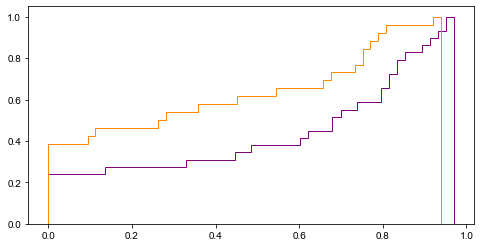

In [12]:
#KS p-value = 0.11 Utest p-value = 0.034. Intermediate largest gap but orange is always higher
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(low_ratio_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(high_ratio_list, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'darkorange')
sc.stats.ks_2samp(low_ratio_list, high_ratio_list), sc.stats.mannwhitneyu(low_ratio_list, high_ratio_list, use_continuity=True, alternative='two-sided')

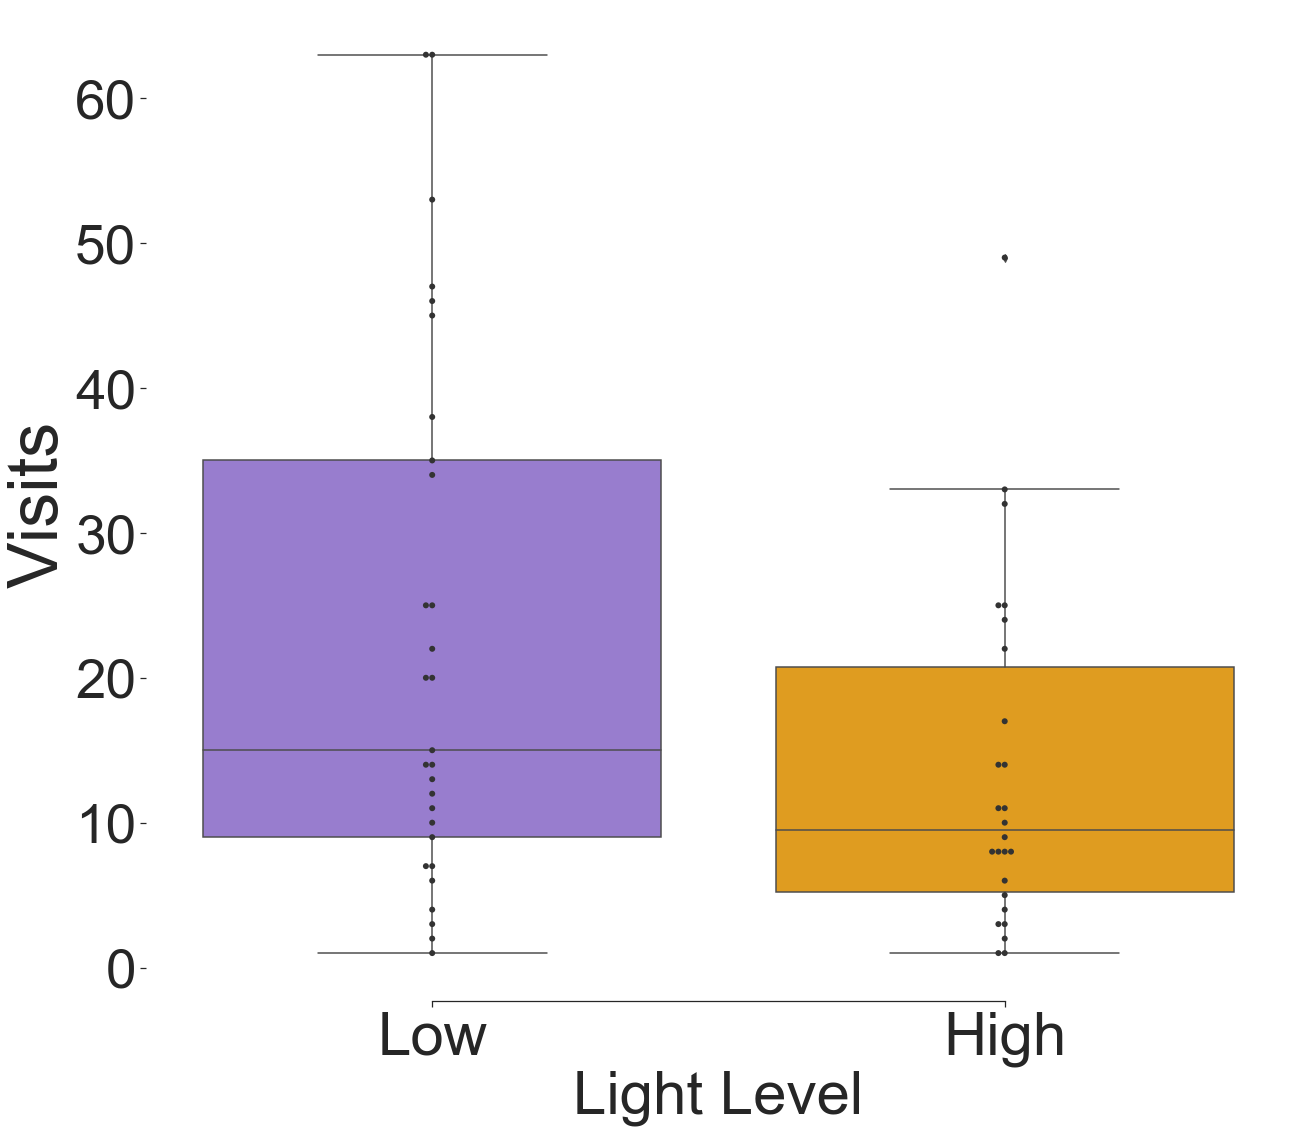

In [35]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(20.52, 18.30))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_visit = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].index)
low_visit = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].index)

lineb = ax.plot(np.zeros(0), '-b')
liner = ax.plot(np.zeros(0), '-r')
lines = (lineb,liner)

for tick in ax.get_yticklabels():
    tick.set_fontsize(55) 
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Visits", size = 70)
ax.set_xlabel("Light Level", size = 60)
# ax.set_title("Visits Per Moth", size = 16)
ax.set_xticklabels(["Low","High"], size = 60)
sns.despine(trim=True, left=True)
plt.savefig(outpath + "\\VisitsPerMoth_Box.png")

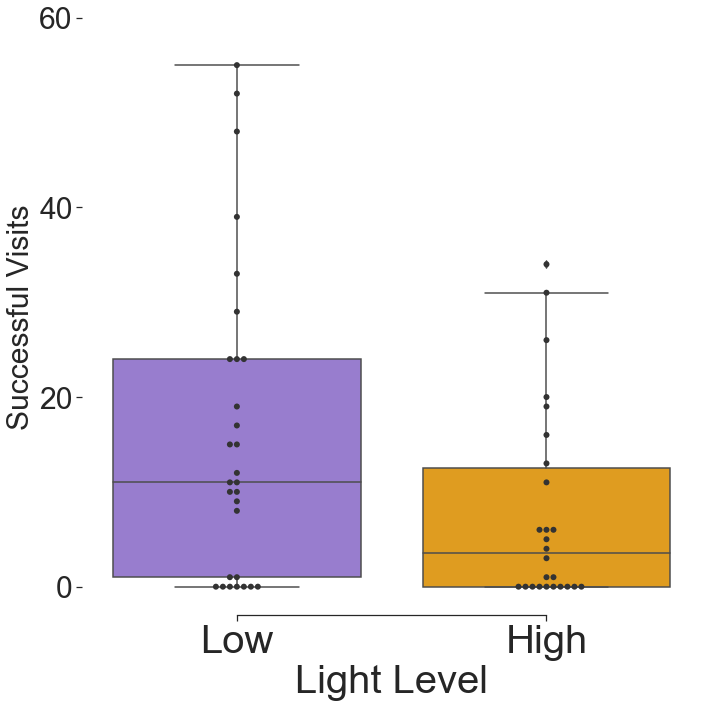

In [14]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="successful_visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="successful_visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_fed = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.Fed_Status.str.contains("yes")].index)
low_fed = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.Fed_Status.str.contains("yes")].index)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Successful Visits", size = 30)
ax.set_xlabel("Light Level", size = 40)
ax.set_xticklabels(["Low","High"], size = 40)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
# ax.set_title("Ratio of Successful Visits Per Moth", size = 40)
ax.set_ylim(-3,60)
ax.locator_params(nbins=4, axis = "y")


# ax.text(0.66, 1.3,'N = ' +str(high_fed)  + "/" + str(high_visit), color = 'orange', weight = 'bold', size = 30)
# ax.text(0.66, 1.1, 'N = ' + str(low_fed) + "/" + str(low_visit), color = 'mediumpurple', weight = 'bold', size = 30)
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.savefig(outpath + "//SuccessfulVisits.png")

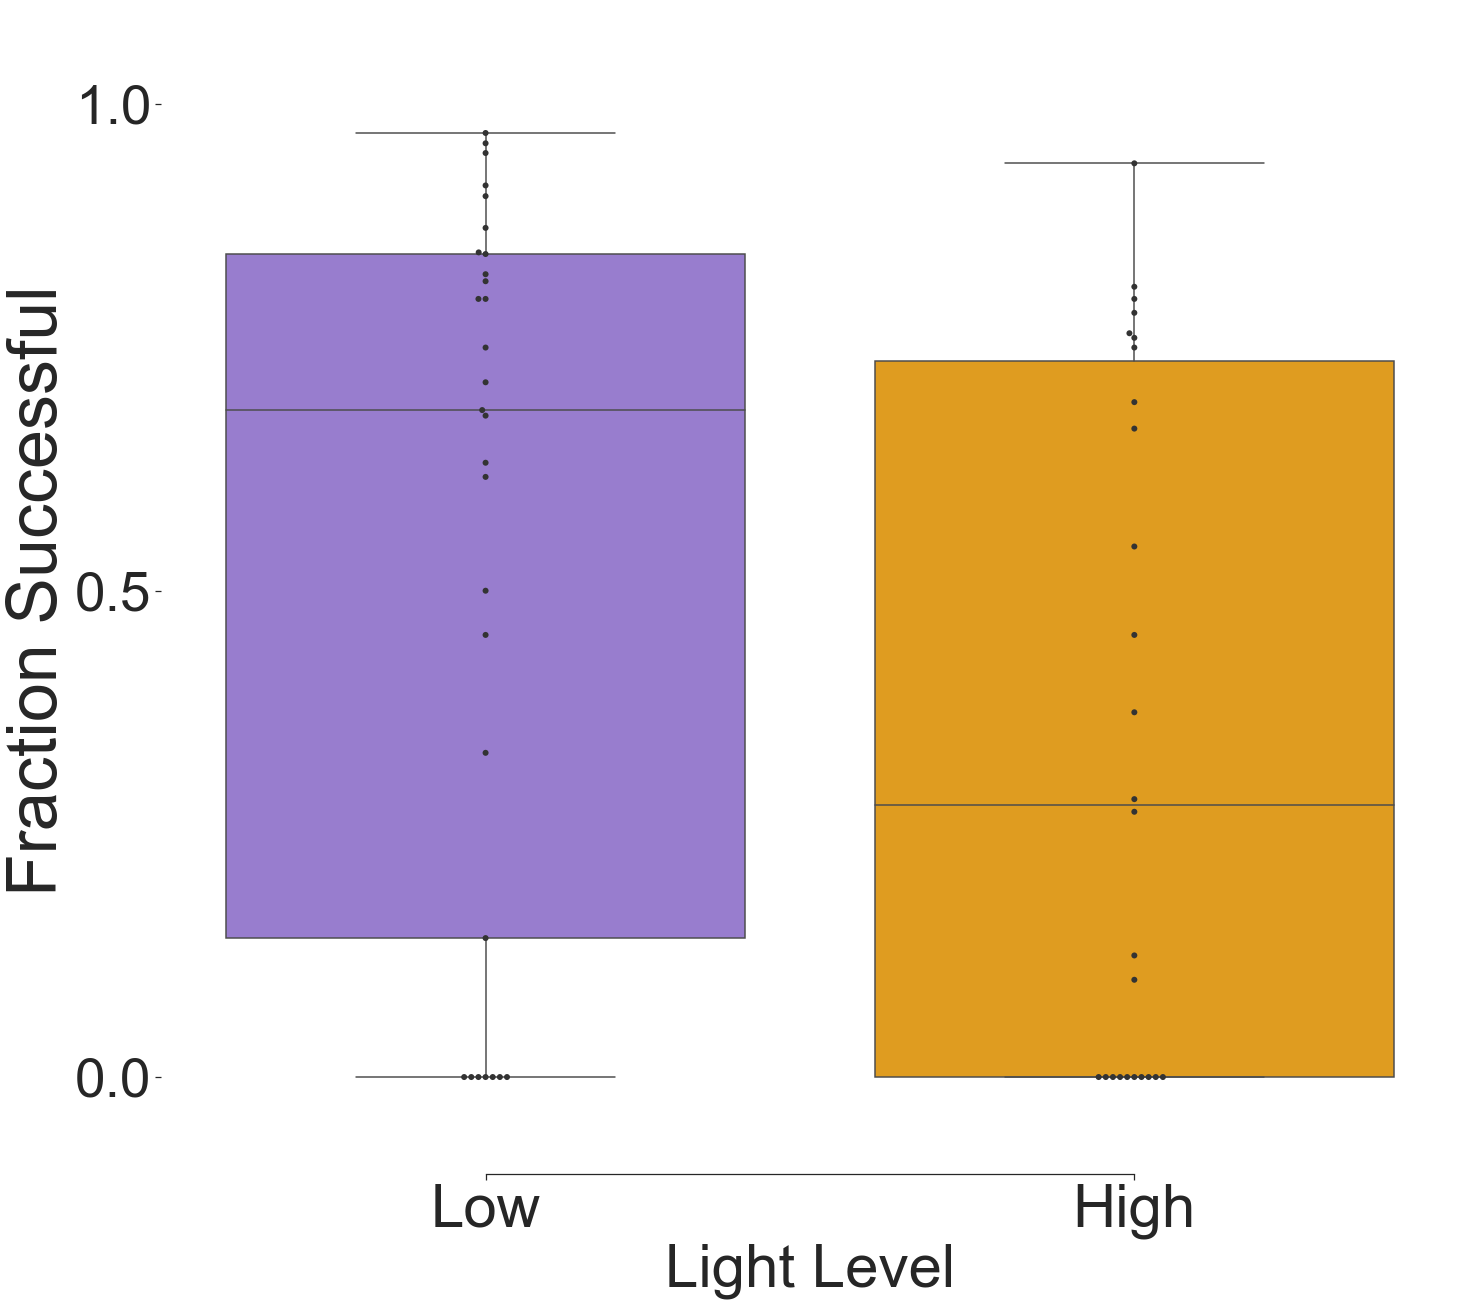

In [34]:
#do a qqplot of this followed with normality tests (as well as something to quant show that they have similar shpae)
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20.52, 18.30))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="ratio", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="ratio", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_fed = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.Fed_Status.str.contains("yes")].index)
low_fed = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.Fed_Status.str.contains("yes")].index)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Fraction Successful", size = 70)
ax.set_xlabel("Light Level", size = 60)
ax.set_xticklabels(["Low","High"], size = 60)
for tick in ax.get_yticklabels():
    tick.set_fontsize(55) 
# ax.set_title("Ratio of Successful Visits Per Moth", size = 40)
ax.set_ylim(-0.1,1.1)
ax.locator_params(nbins=4, axis = "y")


# ax.text(0.66, 1.3,'N = ' +str(high_fed)  + "/" + str(high_visit), color = 'orange', weight = 'bold', size = 30)
# ax.text(0.66, 1.1, 'N = ' + str(low_fed) + "/" + str(low_visit), color = 'mediumpurple', weight = 'bold', size = 30)
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.savefig(outpath + "//FractionSuccessfulVisits.png")

In [16]:
test_stat = np.mean(moth_data.ratio[moth_data.Light_Level == "low"]) - np.mean(moth_data.ratio[moth_data.Light_Level == "high"])
test_stat

0.20130739569327116

In [17]:
# resample
def null_perm_test():
    null_trt = np.random.choice(moth_data.Light_Level, replace = False, size = len(moth_data.Light_Level))
    null_test_stat = np.mean(moth_data.ratio[null_trt == "low"]) - np.mean(moth_data.ratio[null_trt == "high"]) 
    return(null_test_stat)

# resample 10000 times to generate sampling distribution under the null hypothesis
null_dist = np.array([null_perm_test() for ii in range(10000)])

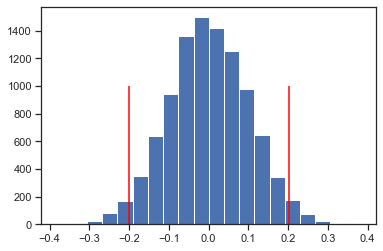

In [18]:
plt.hist(null_dist, bins= 20)
plt.vlines(x = test_stat, ymin = 0, ymax =1000, color = "red")
plt.vlines(x = -test_stat, ymin = 0, ymax =1000, color = "red")
plt.show()

In [19]:
pval = np.mean((null_dist >= test_stat) | (-test_stat >= null_dist) )
pval

0.0463

In [20]:
moth_data[(moth_data.Light_Level.str.contains("high"))].values

array([[29, 'L50_c-3_m10', 8, 0.125, 1, 'yes', 'high'],
       [30, 'L50_c-3_m12', 25, 0.8, 20, 'yes', 'high'],
       [31, 'L50_c-3_m13', 22, 0.2727272727272727, 6, 'yes', 'high'],
       [32, 'L50_c-3_m14', 14, 0.7857142857142857, 11, 'yes', 'high'],
       [33, 'L50_c-3_m15', 24, 0.6666666666666666, 16, 'yes', 'high'],
       [34, 'L50_c-3_m21', 25, 0.76, 19, 'yes', 'high'],
       [35, 'L50_c-3_m22', 49, 0.6938775510204082, 34, 'yes', 'high'],
       [36, 'L50_c-3_m24', 1, 0.0, 0, 'no', 'high'],
       [37, 'L50_c-3_m25', 1, 0.0, 0, 'no', 'high'],
       [38, 'L50_c-3_m26', 11, 0.5454545454545454, 6, 'yes', 'high'],
       [39, 'L50_c-3_m2', 2, 0.0, 0, 'no', 'high'],
       [40, 'L50_c-3_m30', 3, 0.0, 0, 'no', 'high'],
       [41, 'L50_c-3_m32', 33, 0.9393939393939394, 31, 'yes', 'high'],
       [42, 'L50_c-3_m33', 3, 0.0, 0, 'no', 'high'],
       [43, 'L50_c-3_m34', 4, 0.0, 0, 'no', 'high'],
       [44, 'L50_c-3_m35', 9, 0.0, 0, 'no', 'high'],
       [45, 'L50_c-3_m37', 11, 0.4545

In [21]:
moth_data = pd.read_csv(r"C:\Users\Daniellab\Documents\TanviStuff\MultiSensory\Lightlevel-FlowerShape\MothChart-LightLevel-FlowerShape.csv")
high_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L50_c-3")) & moth_data.Total_trials.notnull()].index)
low_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L0.1_c-3")) & moth_data.Total_trials.notnull()].index)
high_visit_flower, low_visit_flower

FileNotFoundError: [Errno 2] File C:\Users\Daniellab\Documents\TanviStuff\MultiSensory\Lightlevel-FlowerShape\MothChart-LightLevel-FlowerShape.csv does not exist: 'C:\\Users\\Daniellab\\Documents\\TanviStuff\\MultiSensory\\Lightlevel-FlowerShape\\MothChart-LightLevel-FlowerShape.csv'

In [22]:
duration_list = glob.glob(duration_path + "\\*duration.csv")
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []

for file in duration_list:
    df = pd.read_csv(file)
    nam = file[79:-13]
    name = [nam]*len(df["In_Frame"])
    if nam.startswith("L50"):
        light = ["high"]*len(df["In_Frame"])
    else: 
        light = ["low"]*len(df["In_Frame"])
    df1.extend(name)
    df2.extend(df.In_Frame)
    df3.extend(df.Out_Frame)
    df4.extend(df.ProboscisDetect)
    df5.extend(df.DiscoveryTime)
    df6.extend(df.duration)
    df7.extend(df.pre_duration)
    df8.extend(df.post_duration)
    df9.extend(light)
new_df = pd.DataFrame({'name': df1, 'In_Frame': df2, 'Out_Frame': df3, 'ProboscisDetect':df4, 
                      'DiscoveryTime': df5, 'duration': df6, 'pre_duration': df7, 'post_duration': df8, 'Light_Level': list(np.squeeze(df9))})
new_df.to_csv(duration_path + "\\all_moth_durations.csv")

NameError: name 'outpath_fig' is not defined

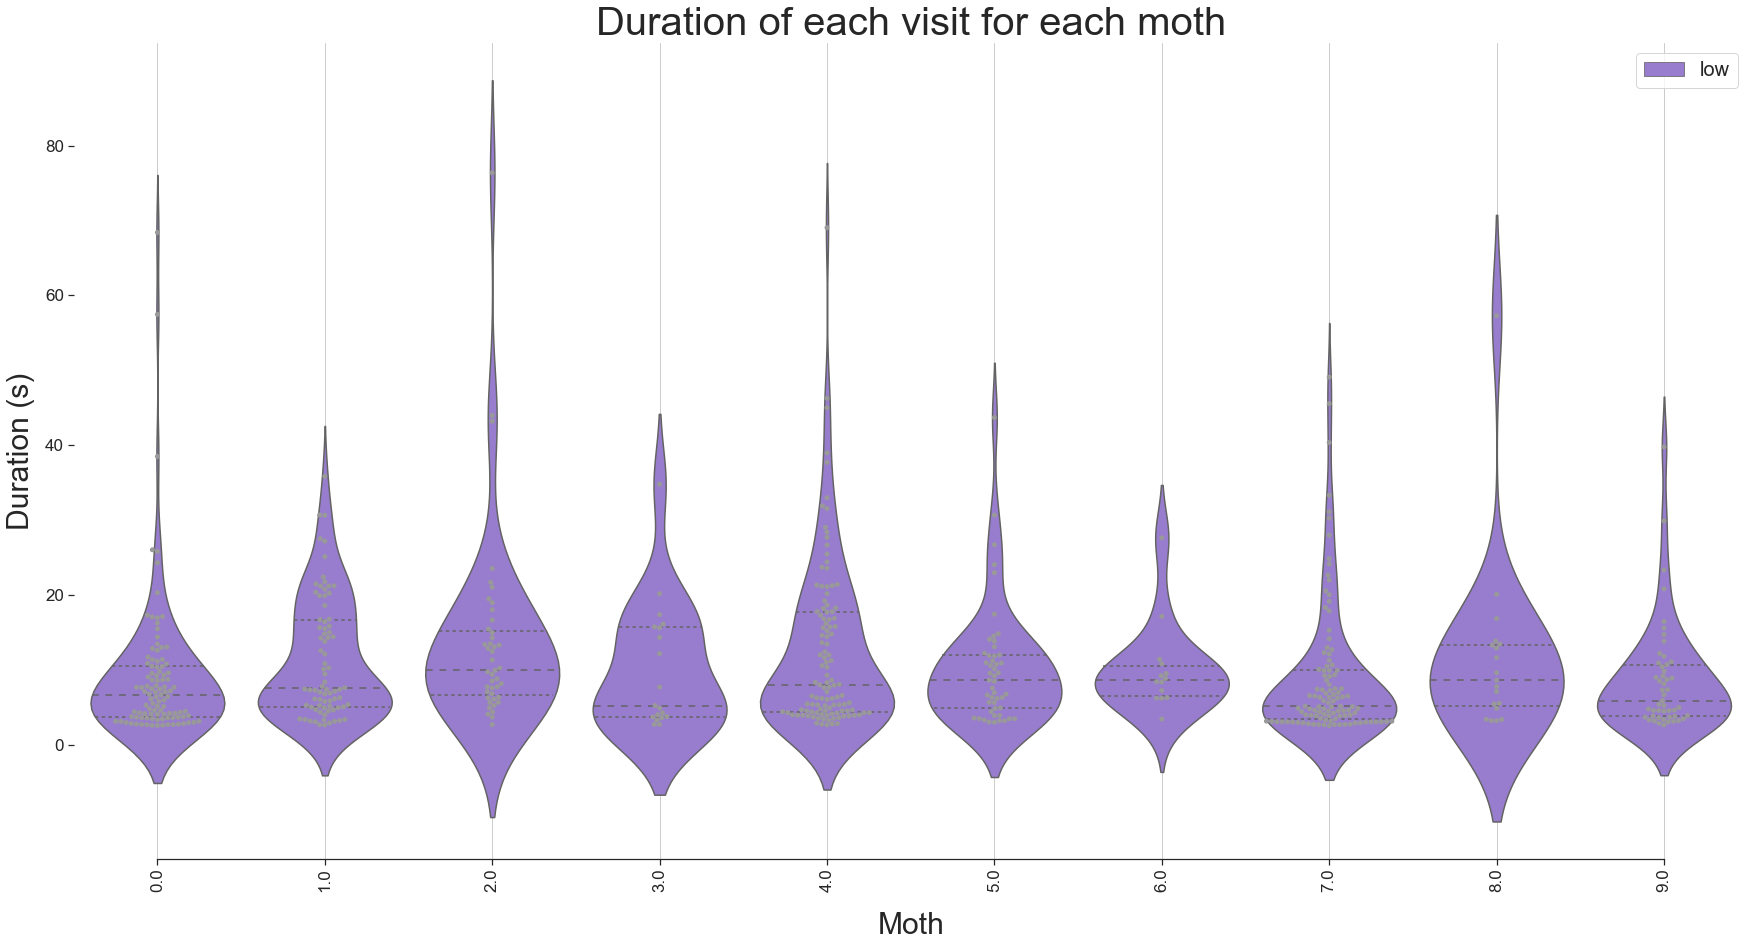

In [23]:
duration_data = pd.read_csv(duration_path + "\\all_moth_durations.csv") 
duration_data['duration(s)'] = pd.Series(duration_data['duration'].values/100, index=duration_data.index)

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=duration_data,
          inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=duration_data,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\DurationPerVisitPerMoth_Violin.png")

In [24]:
# duration without outliers
from scipy import stats
z = np.abs(stats.zscore(duration_data['duration(s)'].values))
outlier_ID = z > 5
duration_data['zscore'] = z
duration_data['outlier_ID'] = outlier_ID
notoutliers_dur = duration_data[duration_data.outlier_ID == False]

NameError: name 'outpath_fig' is not defined

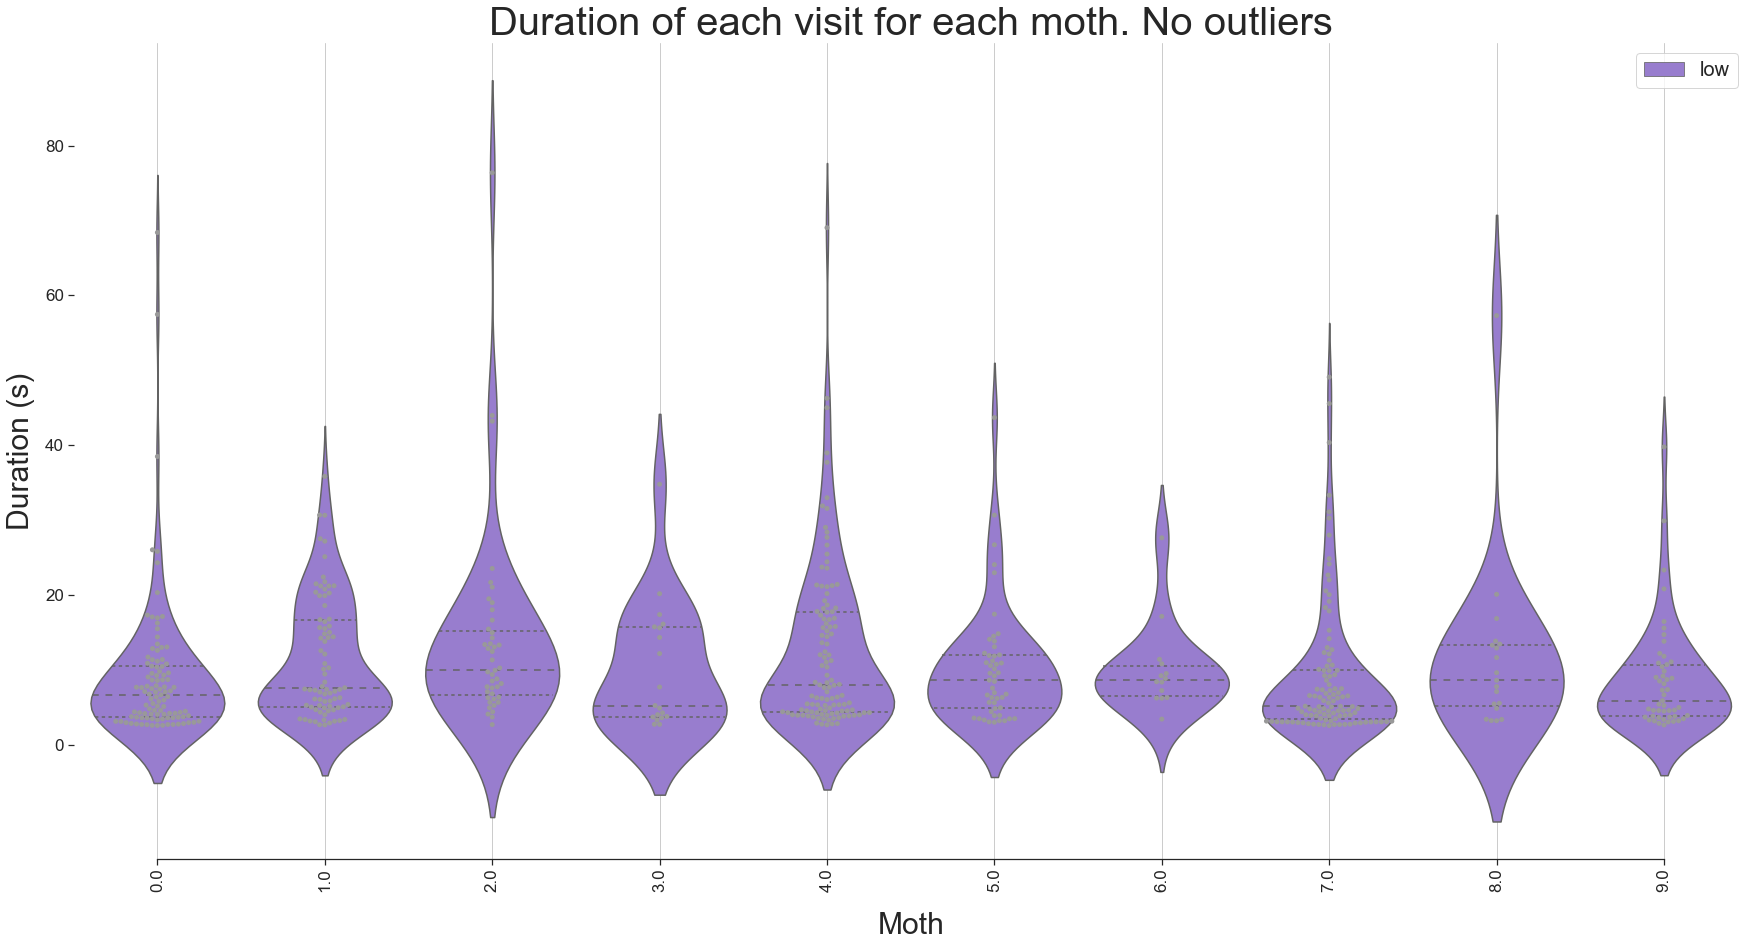

In [25]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=notoutliers_dur,inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=notoutliers_dur,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth. No outliers", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\NoOutliers_DurationPerVisitPerMoth_Violin.png")